# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [310]:
# import and read the csv file
df = pd.read_csv('vgsales.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

In [337]:
# show a few randomly-sampled rows
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_percent
7281,7283,Saltwater Sportfishing,PS,2001.0,Sports,Take-Two Interactive,0.12,0.08,0.00,0.01,0.22,49.129854
12305,12307,Nicola Kanshuu: Model * Oshare Audition,DS,2010.0,Misc,Alchemist,0.00,0.00,0.06,0.00,0.06,49.129854
10385,10387,World Series of Poker: Tournament of Champions...,PSP,2006.0,Misc,Activision,0.10,0.00,0.00,0.01,0.11,49.129854
4767,4769,Jikkyou Powerful Pro Yakuu '94,SNES,1994.0,Sports,Konami Digital Entertainment,0.00,0.00,0.41,0.00,0.41,49.129854
7998,8000,Fight Club,PS2,2004.0,Fighting,Vivendi Games,0.09,0.07,0.00,0.02,0.18,49.129854


The code above is to display the 5 random samples from the file.

In [338]:
# get the DataFrame's schema - notice the auto-detection of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16327 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
 11  NA_percent    16327 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


The code above is to display the dataframe's schema, including different data types and the data shape.

One of the unique features in my data set is that most of the games in the top ten sales records from 1980 to 2020 were sold after 2006. Especially for the games sold in 2006, 3/10 of them entered the top ten sales.

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

In [339]:
# find any rows with missing values
bad_rows = df[ df.isnull().any(axis=1) ]
bad_rows.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_percent
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21,49.129854
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93,49.129854
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64,49.129854


The code above is to find the NAN(missing) value in the data set and display the first 3.

In [317]:
# drop a few rows with missing data manually
new_df = df.drop( df.index[ [0, 1, 2] ] )

# look for missing values again
bad_rows = new_df[ new_df.isnull().any(axis=1) ]
bad_rows.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17


The code above is to drop a few rows with missing data manually and look for missing values again.

In [318]:
# drop the Year with any missing values
df = df.dropna(subset=['Year'])
# display random samples from the dataset
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15429,15432,Worldwide Soccer Manager 2007,PC,2006.0,Sports,Sega,0.00,0.02,0.00,0.00,0.02
6105,6107,Rugby World Cup 2011,X360,2011.0,Sports,505 Games,0.03,0.21,0.00,0.04,0.28
14792,14795,AMNESIA World,PSV,2014.0,Adventure,Idea Factory,0.00,0.00,0.03,0.00,0.03
7854,7856,Sudeki,XB,2004.0,Role-Playing,Microsoft Game Studios,0.14,0.04,0.00,0.01,0.19
12584,12586,SingStar Mallorca Party,PS3,2009.0,Misc,Sony Computer Entertainment,0.00,0.04,0.00,0.02,0.06


The code above is to drop the missing "Year" info.

In [319]:
# check if missing value is still in the dataset
df[ df['Rank'] == '180'][ ['Name', 'Year'] ]

,Name,Year


The code above is to check whether there are still some missing values. I picked one from the displayed before. 

In [320]:
# show a few randomly-sampled rows
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1569,1571,Kung Fu Panda,DS,2008.0,Action,Activision,0.56,0.57,0.00,0.14,1.26
16432,16435,Shinseiki Evangelion: Koutetsu no Girlfriend 2...,PSP,2009.0,Adventure,CyberFront,0.00,0.00,0.01,0.00,0.01
16000,16003,Smart Kid's Mega Game Mix,DS,2009.0,Misc,UFO Interactive,0.01,0.00,0.00,0.00,0.01
15260,15263,PopCap Hits!,X360,2011.0,Misc,PopCap Games,0.00,0.02,0.00,0.00,0.02
9276,9278,7th Dragon,DS,2009.0,Role-Playing,Sega,0.00,0.00,0.14,0.00,0.14


The code above is to display 5 random samples from the new data without missing value.

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

In [321]:
# get an overview of most common stats
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


The code above is to get an overview of most common stats. 

From the information I got using the above code, I can see that despite the world wild count of the game sales, these games have the highest sales in North America.

In [322]:
# count how many games are in each year
df.groupby("Year")['Name'].count()

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: Name, dtype: int64

The code above is to count how many names of games are in each year from 1980 to 2020.

From the above code, I can tell that between 1980 and 2020, the year 2009 has the highest sale. 

In [323]:
# calculate the mean top sales of games in North America 
df.groupby("Name")['NA_Sales'].mean().sort_values()

Name
¡Shin Chan Flipa en colores!                             0.00
Iron Storm                                               0.00
Tabi no Yubisashi Kaiwachou DS: DS Series 2 Chuugoku     0.00
Tabi no Yubisashi Kaiwachou DS: DS Series 3 Kankoku      0.00
Tabi no Yubisashi Kaiwachou DS: DS Series 4 America      0.00
                                                        ...  
Wii Sports Resort                                       15.75
Mario Kart Wii                                          15.85
Super Mario Bros.                                       16.24
Duck Hunt                                               26.93
Wii Sports                                              41.49
Name: NA_Sales, Length: 11360, dtype: float64

The code above is to show the mean of the sales of each game in the region of North America in a ascending order.
I can tell that the game "Wii Sports" has the highest sale in North America between the year of 1980 to 2020.

In [324]:
# display the median sales of games in other regions except North America, Japan and European
df['Other_Sales'].median()

0.01

The code above is to get the median of the games sales in Other region except North America, Japan and European.

In [325]:
# display the median sales of games in European regions except North America, Japan and other regions.
df['EU_Sales'].median()

0.02

The code above is to get the median of the games sales in European.

From the two codes above, I can tell that these game sales in European are higher than in other places besides North America and Japan.

In [333]:
# display the sum of game sales in North America
na_sales_sum = df['NA_Sales'].sum()

# display the sum of game sales in global
global_sales_sum = df['Global_Sales'].sum()

# display the percentage of game sales in North America out of Global
na_sales_percent = na_sales_sum / global_sales_sum * 100
na_sales_percent

49.12985411026307

The code above is to show the game sales in North America account for a percentage of the world's sales.

I can say that game sales in North America account for a large share of the world, almost accounting for half of the sales from 1980 to 2020. The North American market is a very powerful sales market.

In [287]:
# calculate the mean top sales of games's genre in the world
df.groupby("Genre")['Global_Sales'].mean().sort_values()

Genre
Adventure       0.184013
Strategy        0.258465
Puzzle          0.424203
Simulation      0.458472
Misc            0.466444
Action          0.529628
Fighting        0.531160
Sports          0.568247
Racing          0.592798
Role-Playing    0.628035
Shooter         0.800468
Platform        0.946518
Name: Global_Sales, dtype: float64

The code above is to get different genres of games' global sales in an ascending order.

From the code above, I can tell induce that people may like Platform games compared with other genre types of games in world wild.

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

<AxesSubplot:xlabel='Platform', ylabel='Average Top Global Sales Game Genre ($)'>

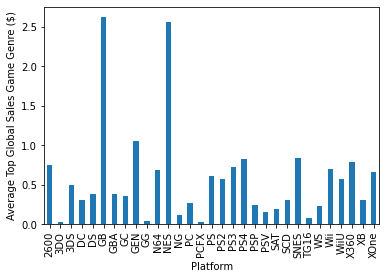

In [288]:
# plot the games' platform and global sales in a bar graph by mean
df_to_plot = df[ ['Platform', 'Global_Sales'] ].groupby(by=['Platform']).aggregate({'mean'})
df_to_plot.plot.bar(ylabel='Average Top Global Sales Game Platform ($)', legend=False)

The code above is to display a bar chart of different platforms of games and the global sales. I use the mean as a aggregate stats to show the graph and concluded that the games in GB platforms saled the highest compared with other platforms. 

<AxesSubplot:ylabel='Genre'>

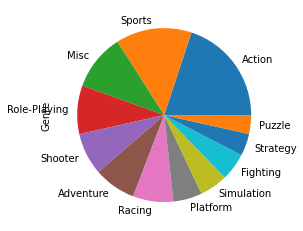

In [289]:
# plot the count of games' genre in a pie chart
df.Genre.value_counts().plot(kind='pie')

The code above is to display a pie chart of different genre counts of games from 1908 to 2020. I concluded that the action games have the largest number of all recorded game genres from 1980 to 2020.

<AxesSubplot:ylabel='Platform'>

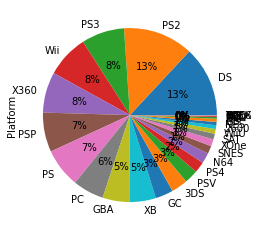

In [335]:
# plot the count of games' platforms in a pie chart and show the percentage
df.Platform.value_counts().plot(kind='pie', autopct='%1.0f%%')

The code above is to display a pie chart of different platforms counts of games from 1908 to 2020. I concluded that the people may prefer the games on PS2 and DS from 1980 to 2020 since these two platforms' game sales are the highest comapred with others.

Text(0, 0.5, 'Global Sales of Games')

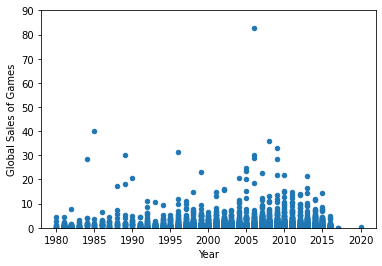

In [303]:
# Draw a graph with pandas and keep what's returned
ax = df.plot(kind='scatter', x='Year', y='Global_Sales')

# Set the x scale because otherwise it goes into weird negative numbers
ax.set_xlim((1978, 2022))
ax.set_ylim((0, 90))

# Set the x-axis label
ax.set_xlabel("Year")

# Set the y-axis label
ax.set_ylabel("Global Sales of Games")

The code above is to display a scatter plot for the the recorded games saled over global from 1980 to 2020. I can conclude that the year of 2006 has the highest global sales of games.

<AxesSubplot:xlabel='Genre', ylabel='Average Top Japan Sales Game Genre ($)'>

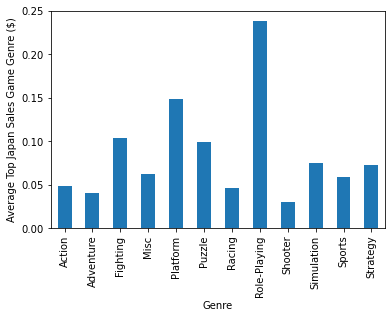

In [306]:
# plot the games' genre and Japan sales in a bar graph by mean
df_to_plot = df[ ['Genre', 'JP_Sales'] ].groupby(by=['Genre']).aggregate({'mean'})
df_to_plot.plot.bar(ylabel='Average Top Japan Sales Game Genre ($)', legend=False)

The code above is to display a bar chart of different genre of games and the averaged sell in Japan. I use the mean as a aggregate stats to show the graph and concluded that the role-playing genre of games had the highest sales in Japan from 1980 to 2020.